  #  Analysis on Netflix Movies & TV Shows
  

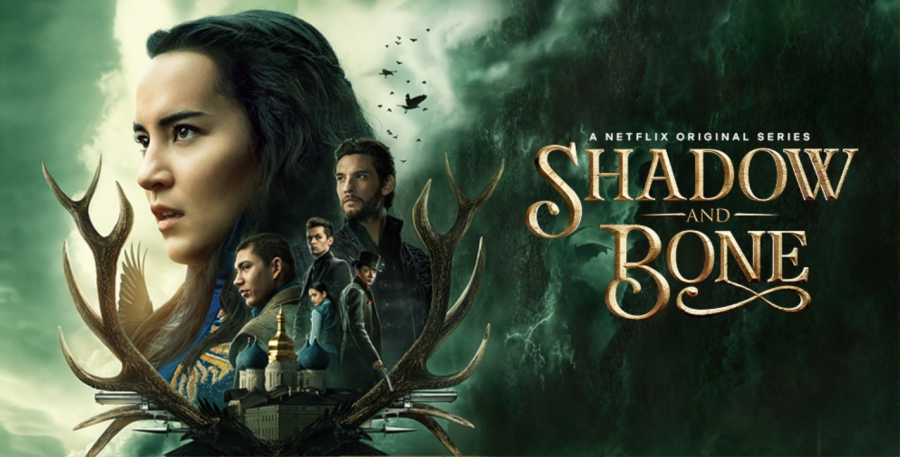


<b>Description</b>
TV Shows and Movies listed on Netflix
This dataset consists of tv shows and movies available on Netflix as of 2008 to January of 2020. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Netflix is a popular service that people across the world use for entertainment. In this EDA, I will explore the                 netflix-shows dataset through visualizations and graphs using matplotlib and seaborn.

In [1]:
#Import relevant library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.5+ KB


We have some missing data in our dataset so let's work on that

In [5]:
#Checking for missing data 
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

## Fixing the missing data

In [6]:
df['director'].fillna('Unknown', inplace = True)
df['cast'].fillna('Unknown', inplace = True)
df['country'].fillna('Unknown', inplace = True)
df['date_added'].fillna('Unknown', inplace = True)
df['rating'].fillna('Unknown', inplace = True)

In [7]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
#Dropping columns that are less relevant

df.drop(['show_id'], axis=1, inplace=True)

In [9]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Netflix Film Type: Movies or TV Show

In [10]:
#Type of Netflix Video

df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

Text(0.5, 1.0, 'Count of Movies and TV Shows')

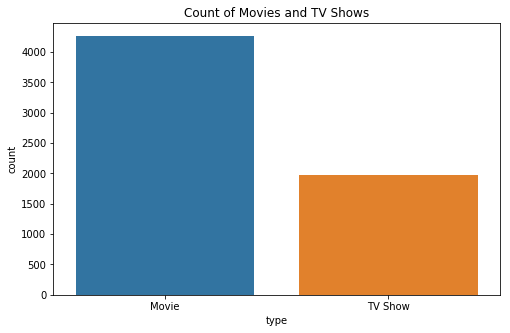

In [11]:
#Visualizing the number of Movies vs TV Show

plt.figure(figsize=(8,5))
sns.countplot(df['type'])
plt.title("Count of Movies and TV Shows")

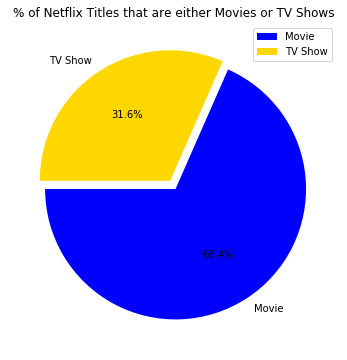

In [12]:
plt.figure(figsize=(12,6))
plt.pie(df['type'].value_counts(), explode=(0.025, 0.05), labels = df['type'].value_counts().index, colors = ['blue', 'gold'], autopct = '%1.1f%%', startangle = 180)
plt.title("% of Netflix Titles that are either Movies or TV Shows")
plt.legend()
plt.show()

There are 4265 Movies (68.4%) and 1969 TV Shows (31.6%) on Netflix. This makes sense since TV shows are always an ongoing and have many episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would have come out as the majority. However, in terms of title, there are far more movie titles (68.5%) than TV show titles (31.5%).

### Netflix Film Ratings

Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest. We will not include the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content. Of course, the unknown will be excluded as well.

In [13]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', 'Unknown', 'UR', 'NC-17'], dtype=object)

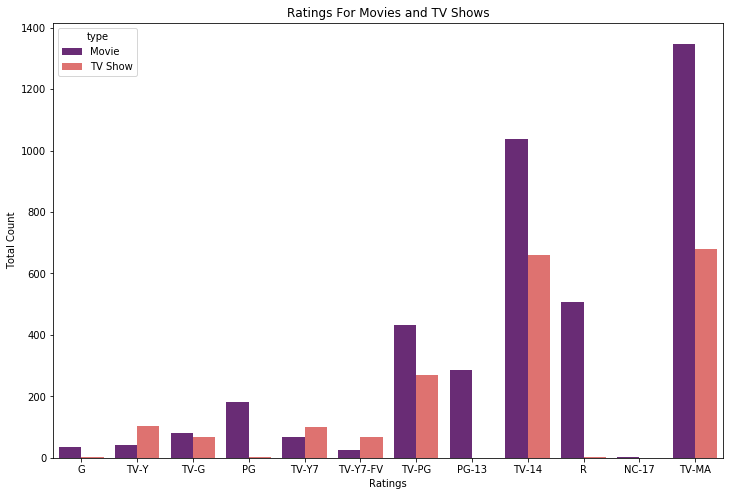

In [14]:
my_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(12,8))
sns.countplot(df['rating'], hue= df['type'], palette='magma', order = my_order )
plt.title('Ratings For Movies and TV Shows')
plt.xlabel('Ratings')
plt.ylabel('Total Count')
plt.show()

There are more movie contents for matured audience than TV Shows. Infact there are much more movie content than tv shows for almost all category of viewers. There are more TV Shows in these three viewers categories: TV-Y, TV-Y7, and TV-Y7-FV.

Let's create a new data frame from the entire dataset exclusively for TV Shows and Movies

In [15]:
movies_df = df[df['type'] == 'Movie']
series_df = df[df['type'] == 'TV Show']

In [16]:
#converting the duration column in movies_df from string to int after removing the 'min' from the column
movies_df['duration'] = movies_df['duration'].str.replace(' min','').astype(int)

In [17]:
#replacing '1 season' to '1 Seasons' to allow for 
series_df['duration'] = series_df['duration'].replace({'1 Season': '1 Seasons'}).str.replace(' Seasons','').astype(int)

Text(0.5, 1.0, 'TV Shows Ratings')

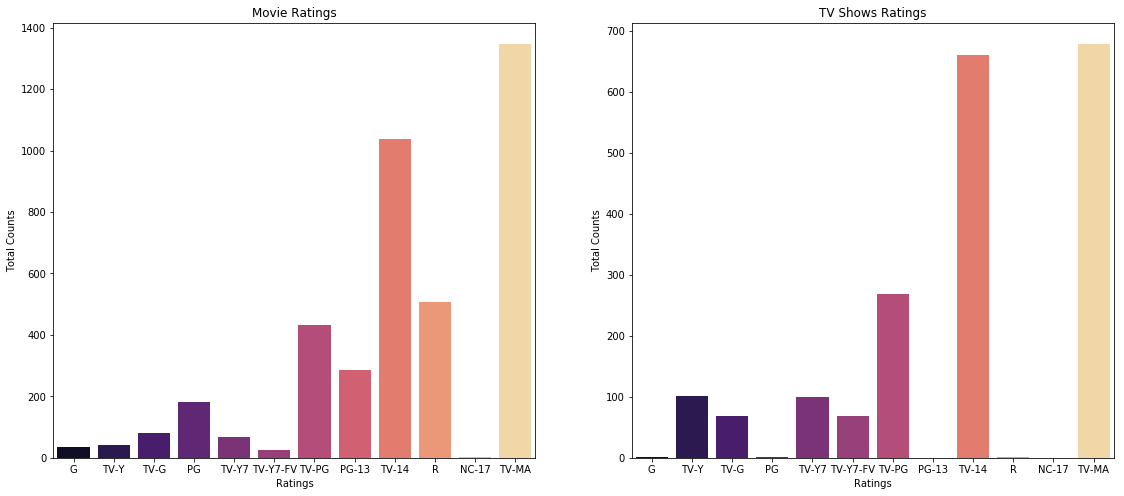

In [18]:
fig, ax = plt.subplots(1,2,figsize=(19,8))
g1 = sns.countplot(movies_df['rating'], order = my_order, palette = 'magma', ax = ax[0])
g1.set_title('Movie Ratings')
g1.set_xlabel('Ratings')
g1.set_ylabel('Total Counts')

g2 = sns.countplot(series_df['rating'], order = my_order, palette = 'magma', ax = ax[1])
g2.set_xlabel('Ratings')
g2.set_ylabel('Total Counts')
g2.set_title('TV Shows Ratings')


Overall, there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.

### The Amount Of Contents Added On Netflix Each Year

Before we carry out this analysis, we'll have to first eleminate the 'Unknown' entries in the date_added column to enable us
convert the column to datetime

In [19]:
#Removing the unknown entries from Movies and TV Shows dataset

movies_df = movies_df[movies_df['date_added']!= 'Unknown']
series_df = series_df[series_df['date_added']!= 'Unknown']

In [20]:
#Converting to datetime and creating a new column for year and month respectively
series_df['year_added'] = pd.to_datetime(series_df['date_added']).dt.year
movies_df['year_added'] = pd.DatetimeIndex(movies_df['date_added']).year
series_df['month_added'] = pd.DatetimeIndex(series_df['date_added']).month
movies_df['month_added'] = pd.DatetimeIndex(movies_df['date_added']).month

Now we will take a look at the amount of content Netflix has added throughout the previous years. Since we are interested in when Netflix added the title onto their platform, we will add a 'year_added' column shows the year of the date from the 'date_added' column as shown above.

In [21]:
movies_year = movies_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year', 'year_added':'count'})

In [22]:
movies_year

,year,count
0,2019,1546
1,2018,1290
2,2017,913
3,2016,264
4,2020,147
5,2015,58
6,2014,19
7,2011,13
8,2013,6
9,2012,4


In [23]:
series_year = series_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year', 'year_added':'count'})
series_year

,year,count
0,2019,803
1,2018,492
2,2017,387
3,2016,192
4,2020,37
5,2015,32
6,2014,6
7,2013,6
8,2012,3
9,2008,1


Text(0.5, 1.0, 'The Number Of Content Added On Netflix Each Year')

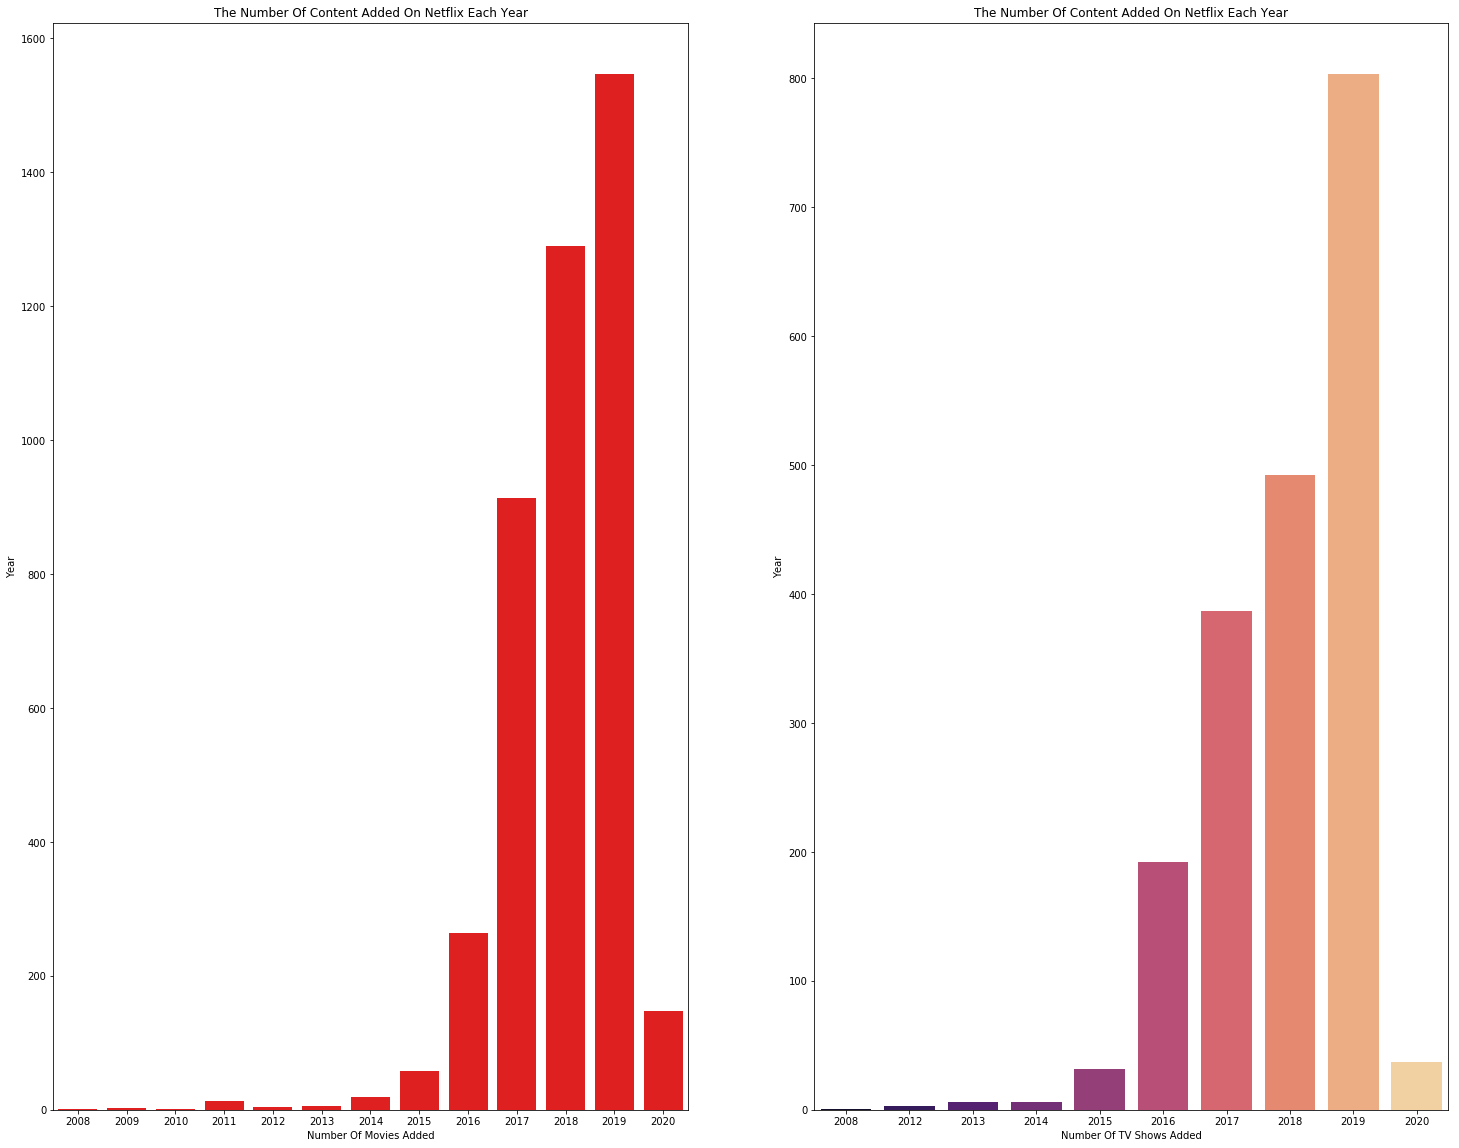

In [24]:
fig,ax = plt.subplots(1,2,figsize=(25,20))
g1 = sns.barplot( data = movies_year, x = 'year', y = 'count', color='red', ax = ax[0])
g1.set_xlabel('Number Of Movies Added')
g1.set_ylabel('Year')
g1.set_title('The Number Of Content Added On Netflix Each Year')

g2 = sns.barplot(data= series_year, x = 'year', y = 'count', palette='magma', ax= ax[1])
g2.set_xlabel('Number Of TV Shows Added')
g2.set_ylabel('Year')
g2.set_title('The Number Of Content Added On Netflix Each Year')


Plotting the same graph on same x-axis

Text(0, 0.5, 'Number of TV Shows Added')

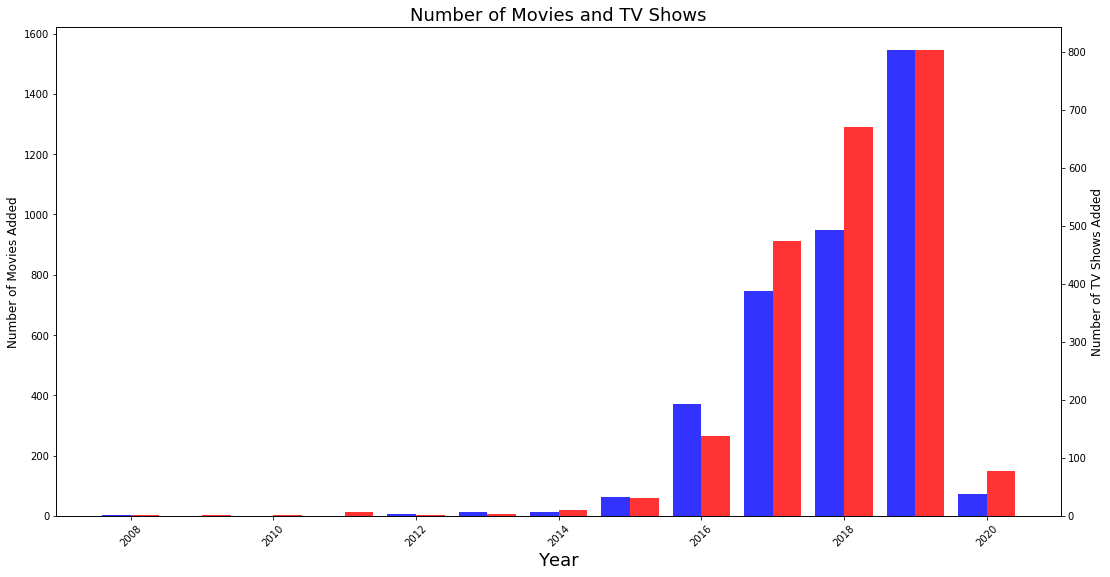

In [150]:

fig, ax = plt.subplots(figsize=(18,9))
ax.bar(movies_year['year'], movies_year['count'], color='red', width= 0.4, alpha=0.8, align='edge')
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of Movies Added', fontsize=12)
ax.set_title('Number of Movies and TV Shows', fontsize=18)
ax.tick_params(axis='x', labelrotation=45)

ax2 = ax.twinx()

ax2.bar(series_year['year'], series_year['count'], color='blue', width= -0.4, alpha=0.8, align='edge')
ax2.set_ylabel('Number of TV Shows Added', fontsize=12)


Plotting a lineplot to visualize the increase in the amount of contents added on Netflix.

In [26]:
#Remove the 'Unknown' entries in the column

df = df[df['date_added'] != 'Unknown']

In [27]:
# Converting the column to datetime and then creating a new column from it

df['date_added'] = pd.to_datetime(df['date_added'])

df['added_year'] = df['date_added'].dt.year
df.head()


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


In [28]:
added_year_df = df['added_year'].value_counts().to_frame().reset_index().rename(columns={'index':'year', 'added_year':'counts'})
added_year_df

,year,counts
0,2019,2349
1,2018,1782
2,2017,1300
3,2016,456
4,2020,184
5,2015,90
6,2014,25
7,2011,13
8,2013,12
9,2012,7


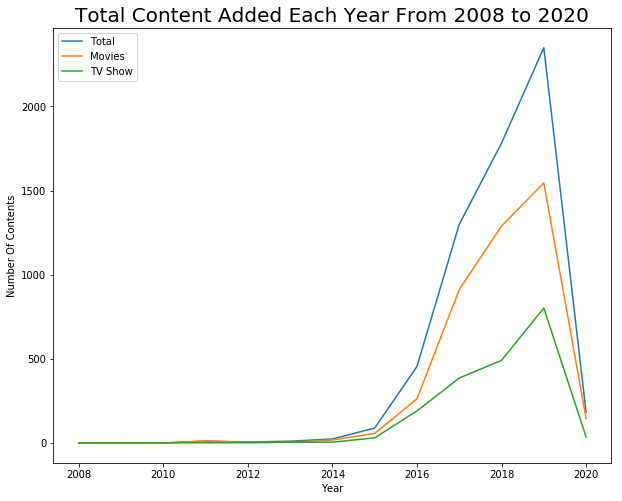

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=added_year_df, x='year', y='counts')
sns.lineplot(data=movies_year, x='year', y='count')
sns.lineplot(data=series_year, x='year', y='count')
ax.set_title('Total Content Added Each Year From 2008 to 2020', fontsize=20)
ax.set_xlabel('Year')
ax.set_ylabel('Number Of Contents')
plt.legend(['Total', 'Movies', 'TV Show'])

Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014.
Since then, the amount of content added has been tremendous. More so, we can see that there has been a consistent growth in the number of movies on Netflix compared to shows

 ### Netflix Film Duration  

Text(0.5, 0, 'Season(s)')

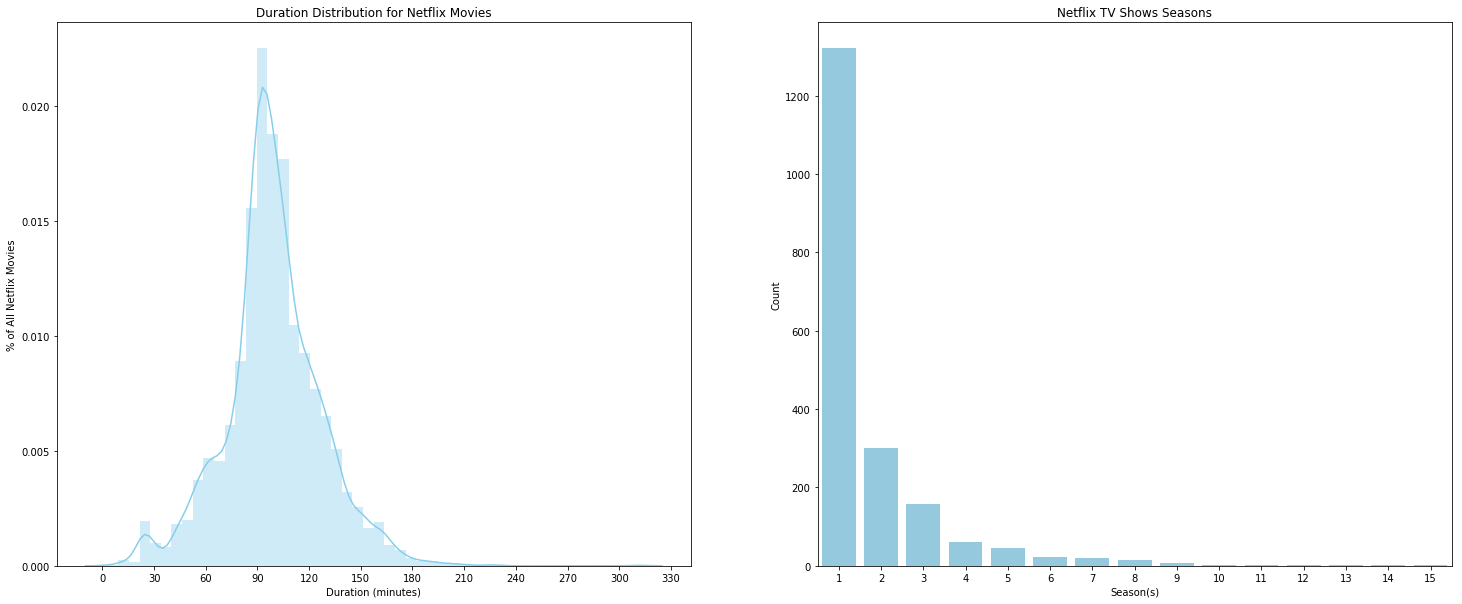

In [30]:

fig, ax = plt.subplots(1,2, figsize=(25, 10))
g1 = sns.distplot(movies_df.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(series_df.duration, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")

### Country with the most available content on Netflix


Now we will explore the countries with the most content on Netflix. Films typically are available in multiple countries as shown in the original dataset. Therefore, we need to seperate all countries within a film before we can analyze the data. After seperating countries and removing titles with no countries available, we can plot a Top 30 list to see which countries have the highest availability of films on Netflix.

In [284]:
df['country'].value_counts()

United States                                         2026
India                                                  777
Unknown                                                474
United Kingdom                                         347
Japan                                                  175
Canada                                                 141
South Korea                                            136
Spain                                                  117
France                                                  90
Mexico                                                  83
Turkey                                                  79
Australia                                               70
Taiwan                                                  69
Hong Kong                                               51
United Kingdom, United States                           50
China                                                   50
Thailand                                                

As expected, some movies are available in more than one countries. So to easily rank the countries that have access to the most films on Netflix, we'll have to write a function to properly extract each countries 

Text(0.5, 1.0, 'Top 30 Countries With The Highest Film Accesiblity On Netflix')

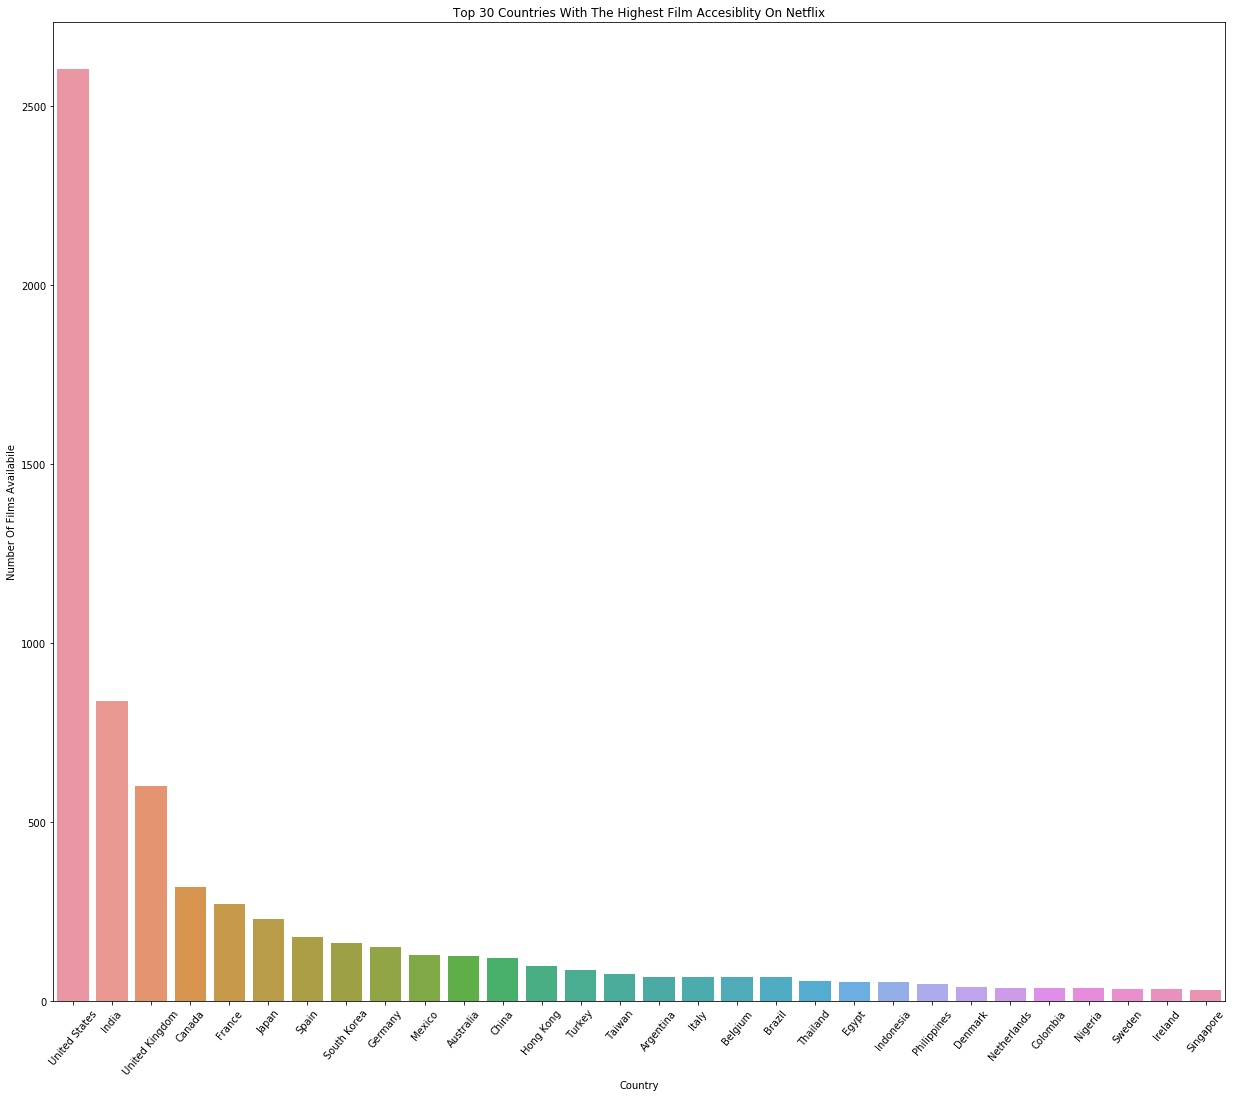

In [310]:
filter_countries = df.set_index('title')['country'].str.split(', ', expand=True).stack().reset_index(level=1,drop=True)
filtered_countries = filter_countries[filter_countries != 'Unknown']

plt.figure(figsize=(21,18))
sns.countplot(filtered_countries, order= filtered_countries.value_counts().index[:30])
plt.xlabel('Country')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('Number Of Films Availabile')
plt.title('Top 30 Countries With The Highest Film Accesiblity On Netflix')

In [308]:
filtered_countries.value_counts(normalize=True)[23:29]*100

Denmark        0.529986
Netherlands    0.516039
Colombia       0.502092
Nigeria        0.502092
Sweden         0.460251
Ireland        0.460251
dtype: float64

Unsurprisingly, the United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is in the 12th position and not close to the top 10 even though it has about 18% of the world's population. Reasons for this could be for political reasons and the banning of certain applications which isn't uncommon between the United States and China.

Intrestingly, Nigeria is the top African country with the highest film accessibility on Neflix surpasing South Africa which occupies the 31st position. 

More so, as at January 2020, Nigeria has access to 0.50% (36 films) of contents on Netflix; which is quite poor; given that Nigeria is the most populated black nation in the world with its Nollywood being one of the highest grossing industry in the country. The number of smartphone users have also doubled in the past couple of years, so Netflix still has a lot of work to do as regard penertrating the Nigerian market. 

Although the dataset span from 2008 - January 2020, I'd like to beleve there's a huge improvement on % of Netflix's content accesibilty in Nigeria

### Popular Genre On Netflix

Text(0, 0.5, 'Genres')

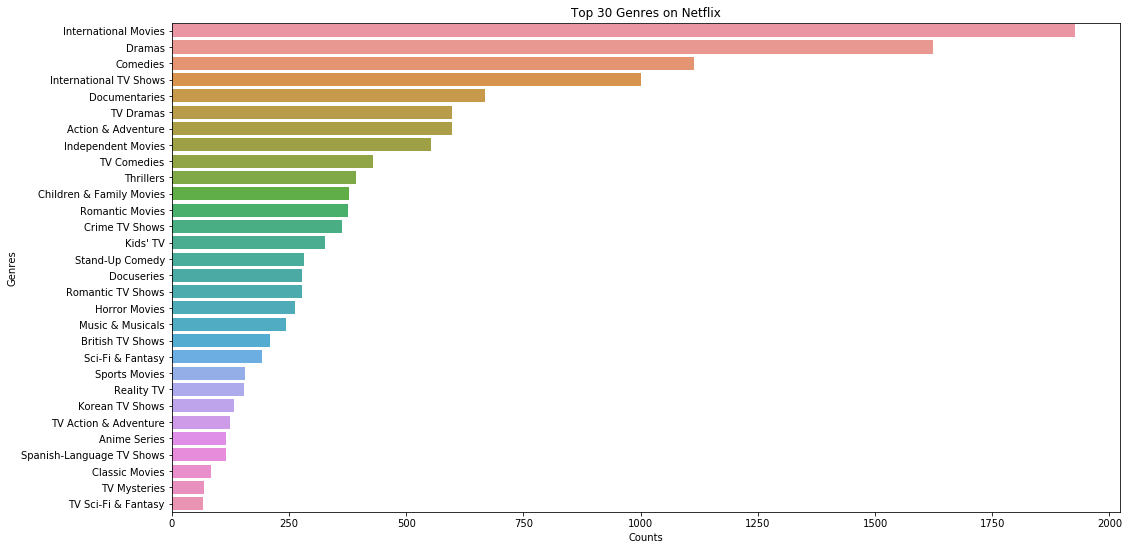

In [312]:
filtered_genres = df.set_index('title')['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(17,9))
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:30])
plt.title('Top 30 Genres on Netflix')
plt.xlabel('Counts')
plt.ylabel('Genres')

#### Top 5 Genres for Movies and TV Shows

Text(0, 0.5, 'Number of TV Shows')

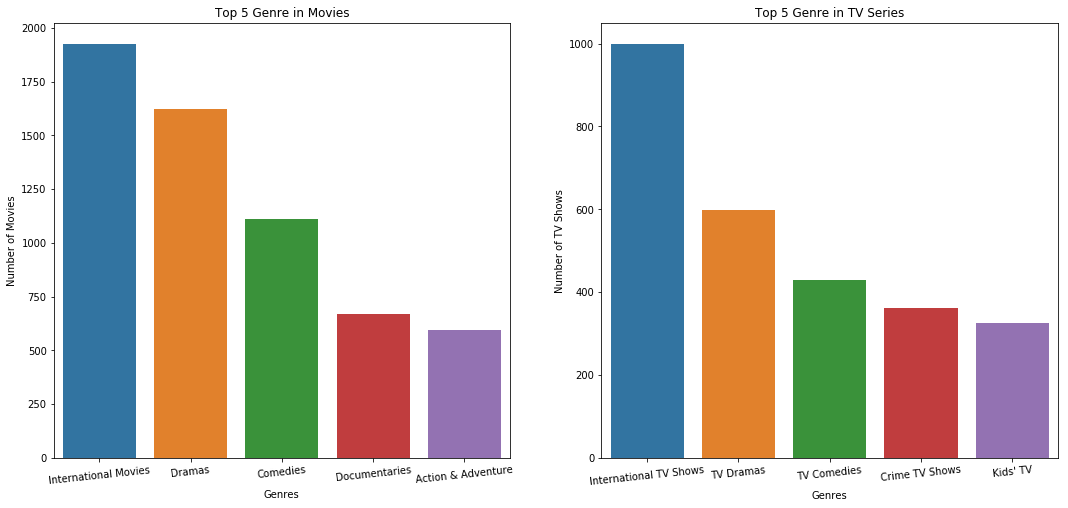

In [315]:
movies_genres = movies_df.set_index('title')['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
series_genres = series_df.set_index('title')['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)


fig, ax = plt.subplots(1,2,figsize=(18,8))
g1 = sns.countplot(movies_genres, order=movies_genres.value_counts().index[0:5],ax=ax[0])
g1.set_title('Top 5 Genre in Movies')
g1.set_xlabel('Genres')
g1.tick_params(axis='x', labelrotation=6)
g1.set_ylabel('Number of Movies')

g2 = sns.countplot(series_genres, order=series_genres.value_counts().index[:5],ax=ax[1])
g2.set_title('Top 5 Genre in TV Series')
g2.set_xlabel('Genres')
g2.tick_params(axis='x', labelrotation=6)
g2.set_ylabel('Number of TV Shows')

International Movies and International TV Shows are the highest genre in Movies and TV Shows respectively. In terms of movies, Comedies surprisingly followed after by Dramas.

Even though the United States has the most content available, it looks like Netflix has decided to release a ton movies and series that'll be available to anyone from any country; hence the reason International Movies & TV Shows ranks the most. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers. 
More so, no streaming platform would wanna waste money to produce a movie or seasonal show and still exclude international subscribers from streaming the show on their platform; especally now that there's a burgeoning streaming war

### Director With The Most Films on Netflix

Text(0, 0.5, 'Names of Directors')

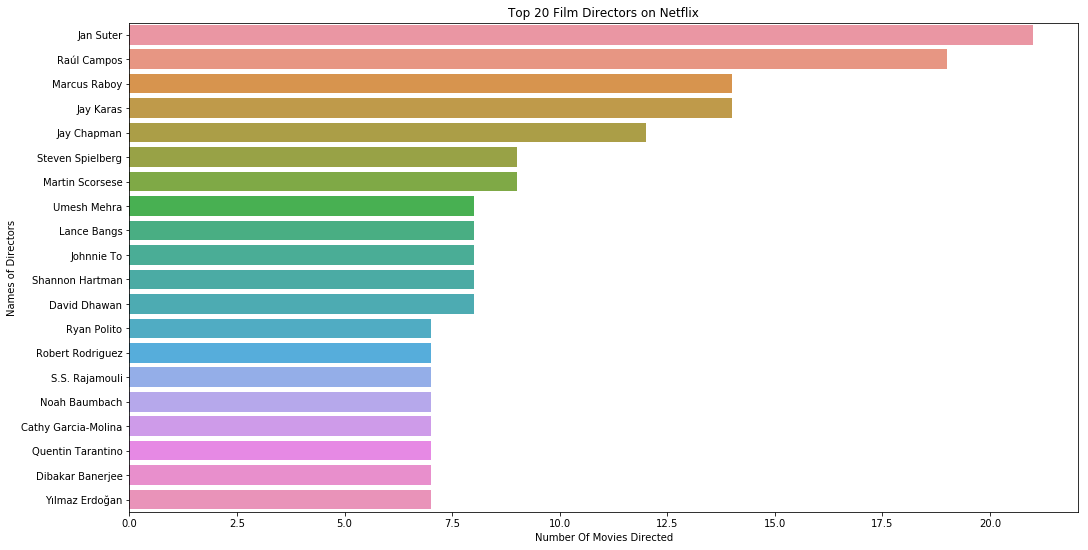

In [320]:
director_filtered = df.set_index('title')['director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
director_filtered = director_filtered[director_filtered!= 'Unknown']
plt.figure(figsize=(17,9))
sns.countplot(y = director_filtered, order=director_filtered.value_counts().index[:20])
plt.title('Top 20 Film Directors on Netflix')
plt.xlabel('Number Of Movies Directed')
plt.ylabel('Names of Directors')

Text(0, 0.5, 'Actors')

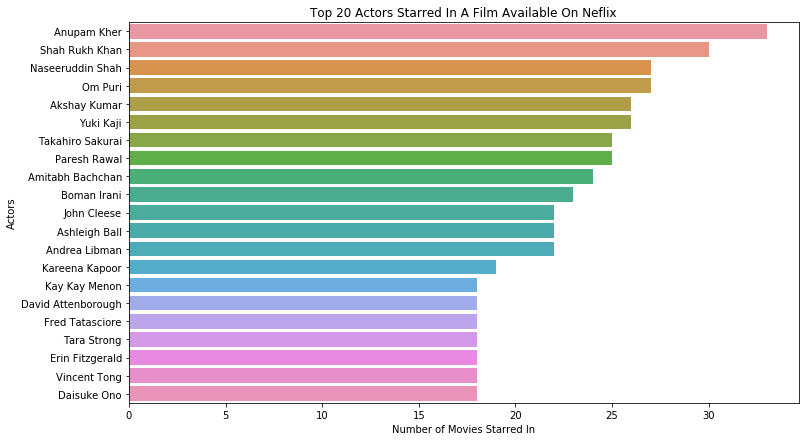

In [324]:
cast_filtered = df.set_index('title')['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
cast_filtered = cast_filtered[cast_filtered != 'Unknown']
plt.figure(figsize=(12,7))
sns.countplot(y=cast_filtered, order= cast_filtered.value_counts().index[:11])
plt.title('Top 20 Actors Starred In A Film Available On Neflix')
plt.xlabel('Number of Movies Starred In')
plt.ylabel('Actors')



### How does the timeline look like for the addition of International Movies compared to International TV Shows?

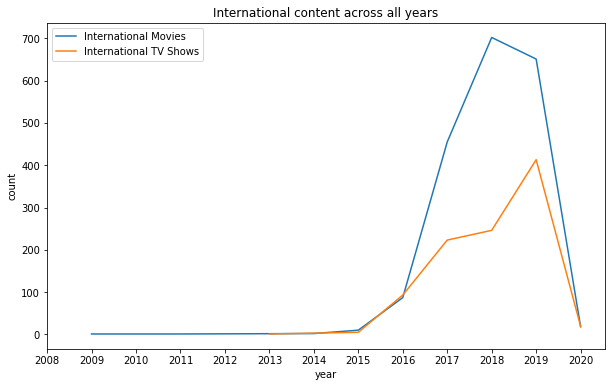

In [329]:
international_movies = df[df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['added_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','added_year':'count'})

international_tv_shows = df[df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_tv_shows['added_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','added_year':'count'})

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2021, 1))
plt.title("International content across all years")
plt.legend(['International Movies','International TV Shows'])

Based on the timeline, we can see that there are far more international movie releases than there are international tv show releases. However, near 2018, the growth of international movies started to decline